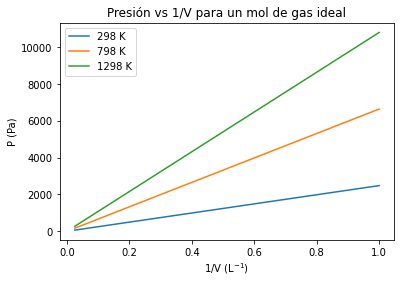

In [7]:
import matplotlib.pyplot as plt

# Constantes
R = 8.314 # J/(mol*K)
n = 1 # mol

# Temperaturas
T1 = 298 # K
T2 = 798 # K
T3 = 1298 # K

# Volumenes
V = list(range(1, 41)) # L

# Cálculo de las presiones
P1 = [n*R*T1/i for i in V]
P2 = [n*R*T2/i for i in V]
P3 = [n*R*T3/i for i in V]

V_ = [1/i for i in V]

# Graficar las tres curvas en la misma figura
plt.plot(V_, P1, label='298 K')
plt.plot(V_, P2, label='798 K')
plt.plot(V_, P3, label='1298 K')

# Configuración de la figura
plt.xlabel('1/V (L$^{-1}$)')
plt.ylabel('P (Pa)')
plt.title('Presión vs 1/V para un mol de gas ideal')
plt.legend()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de parámetros de la ecuación de Vander Waals para el gas metano
a = 2.253  # atm L^2/mol^2
b = 0.0432  # L/mol
R = 0.08206  # L atm/(mol K)

# Definición de las temperaturas a graficar
T_values = [0.11, 0.25, 0.5, 0.75, 1, 2]  # en unidades de Tc

# Definición de la función de la ecuación de Vander Waals
def van_der_waals_eqn(P, V, T):
    return P + a/V**2 - (R*T)/(V-b)

# Definición de la derivada de la función de la ecuación de Vander Waals
def van_der_waals_deriv(P, V, T):
    return -1 + (2*a/V*3) + (R*T)/(V-b)*2

# Definición del método de Newton-Raphson para encontrar la raíz de la ecuación de Vander Waals
def newton_raphson(P_guess, V_guess, T):
    tolerance = 1e-6
    max_iterations = 100
    P = P_guess
    V = V_guess
    for i in range(max_iterations):
        f = van_der_waals_eqn(P, V, T)
        df = van_der_waals_deriv(P, V, T)
        P -= f/df
        V -= f/df
        if abs(f) < tolerance:
            return P, V
    print("Newton-Raphson method did not converge")
    return None, None

# Graficación de las curvas de equilibrio
for T in T_values:
    Tc = 190.6  # K, temperatura crítica del metano
    V_values = np.linspace(0.05, 0.5, 100)  # L/mol, rango de volúmenes a graficar
    P_values = np.zeros_like(V_values)
    for i, V in enumerate(V_values):
        P_guess = R*T/(V-b)
        V_guess = V